In [2]:
import pandas as pd #데이터 구성 패키지 : Series, DataFrame
import numpy as np #행렬 연산 패키지
import matplotlib #데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화(추세 등)패키지
from scipy import stats #통계 분석 패키지
import scipy.stats 

%matplotlib inline 
#jupyter notebook 내 그래프를 바로 그리기 위한 설정  

In [3]:
matplotlib.rc('font', family='Malgun Gothic') #matplotlib 패키지 한글 깨짐 처리 시작
plt.rc('font', family='Malgun Gothic') 

In [7]:
df=pd.DataFrame({'work_1':[270,228,277],
                 'work_2':[260,285,284],
                 'work_3':[236,225,231],
                 'work_4':[234,262,208]},
                 index=['HSG28','SS400','SPA-H'])
chi, pval, dof, expected=stats.chi2_contingency(df.T)
df

,work_1,work_2,work_3,work_4
HSG28,270,260,236,234
SS400,228,285,225,262
SPA-H,277,284,231,208


In [12]:
from scipy.stats import chi2_contingency

chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi2 test")
print("chi2:{0:0.3f}".format(chi))
print("p-value: {0:0.3f}".format(pval))
print("degree of freedom:{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi2 test
chi2:13.366
p-value: 0.038
degree of freedom:6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

# 데이터 선언
Minutes=[1,2,3,4,4,5,6,6,7,8]
Units=[23,29,49,64,74,87,96,97,109,119]
# Simple Linear Regression 실행
Minutes=sm.add_constant(Minutes)
model=sm.ols(Units,Minutes)
result=model.fit()
print(result.summary())

AttributeError: module 'statsmodels.api' has no attribute 'ols'

In [16]:
from sklearn.linear_model import LinearRegression 
import statsmodels.formuala.api as smf
formula="MiNUTES~UNITS"
model=smf.ols(formula, data=df)

ModuleNotFoundError: No module named 'statsmodels.formual'

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.60e-51
Time:                        16:50:35   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

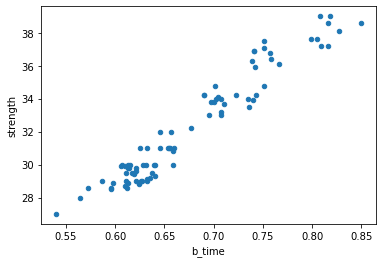

In [41]:
df_raw=pd.read_csv("/home/piai/Downloads/데이터/correlation.csv", engine='python')
df_raw.head(3)

from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf
df_raw.plot.scatter(x="b_time",y="strength")
formula="strength~b_time" #"y~x"
model=smf.ols(formula, data=df_raw)
result=model.fit()

print(result.summary())
print()
print("H0: 정규성을 가진다.")
print("H1: 정규성을 가지지 않는다.")
print("")
print("회귀식은 b_time=2.10+44.55*strength이고 설명력은 93.3%이다. p-value는 0.05보다 작으므로 정규성을 가지지 않는다고 볼 수 있다.")

In [47]:
# F-statistics값이 크다. 
# omnibus 정규성 검정 
df_1.head(3)

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48


In [53]:
df_1=pd.read_csv("/home/piai/Downloads/통계 이해/직무능력평가.csv",engine='python')
df_1.head(3)
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf
model=smf.ols(formula="EVAL~DISSATIS",data=df_1)
result=model.fit()
print(result.summary())
print("")
print("H0:정규성을 가진다")
print("H1:정규성을 가지지 않는다")
print("")
print("잔차의 정규성 평가 결과, p-value는 0.024로 유의수준(0.05)보다 낮으므로 정규성을 가지지 않는다라고 볼 수 있다.") #모델이 정확하지 ㅏㄶ다. 
print("Durbin-Watson값은 2.25로 0~4중 2에 가까우므로 약한 음의 상관관계를 가짐을 알 수 있다.")
print("회귀식은 (직무수행평가)=14.38+0.7546*(직원의 불만 처리 수준)이며 회귀식의 설명력은 93.3%이다.")
#F-statistic 
#계수 값이 크면 영향력이 크다. 두 단위를 확인해야 한다. 계수들도 표준화한다. ???

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.86
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.99e-08
Time:                        17:03:59   Log-Likelihood:                -99.882
No. Observations:                  30   AIC:                             203.8
Df Residuals:                      28   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3763      6.620      2.172      0.0

In [54]:
# 기술통계 
# 중위값이 outliner에 둔감하다. 
# 변수들의 연속성(측정에서 나오는 것),이산형
# 정규성 : 정규분포란 평균을 중심으로 좌우 대칭인 종모양 분포 
# x=N(mu,sigma**2) > x_bar ~ N(mu,sigma/(n.sqrt(0.5))**2) (if 모집단이 정규분포를 따른다면 표본집단도 정규분포를 따른다.)
# z=(x-mu)/sigma > z~(0,1) : 표준 정규분포
# 표준편차가 크면 그래프가 넓게 퍼진다. 

# 추론검정 
# H0: p-value > alpha(0.05) mu_a=mu_b sigma**2_a=sigma**2_b 
# H1: p-value < alpha(0.05) mu_a!=mu_b sigma**2_a!=sigma**2_b
# 가설은 통계량이 아닌 모수로 세운다. 
# 제 1종 오류 : H0가 참일 떄 H0를 기각할 오류 

# 구간추정 
# z=0.05 일 때 1.645 
# z=0.025 일 때 1.96 
# x_bar +- t(a/2,n-1)s/루트n : 모표준편차를 모를 때 표본으로 추론 
# H0는 차이가 없다. H1은 차이가 있다. 

In [ ]:
class set:
    
    def __init__(self):
        self 